In [86]:
!pip install ipython-autotime
%load_ext autotime


  %reload_ext autotime
time: 11.6 s (started: 2022-06-03 21:52:52 +05:30)


In [87]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score
import pandas as pd
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D

time: 0 ns (started: 2022-06-03 21:53:29 +05:30)


In [88]:
X_train = np.loadtxt('C:\\Users\\abhin\\Downloads\\Compressed\\Data\\input.csv', delimiter = ',')
Y_train = np.loadtxt('C:\\Users\\abhin\\Downloads\\Compressed\\Data\\labels.csv', delimiter = ',')

X_test = np.loadtxt('C:\\Users\\abhin\\Downloads\\Compressed\\Data\\input_test.csv', delimiter = ',')
Y_test = np.loadtxt('C:\\Users\\abhin\\Downloads\\Compressed\\Data\\labels_test.csv', delimiter = ',')

time: 3min 31s (started: 2022-06-03 21:53:32 +05:30)


In [89]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

time: 1.34 s (started: 2022-06-03 21:57:30 +05:30)


In [90]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)
time: 94 ms (started: 2022-06-03 21:57:35 +05:30)


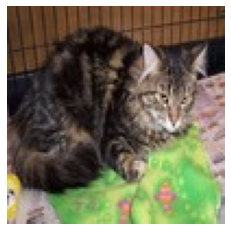

time: 5.53 s (started: 2022-06-03 21:57:38 +05:30)


In [91]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.axis('off')
plt.show()

**MODEL**

In [96]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

time: 187 ms (started: 2022-06-03 21:59:01 +05:30)


In [97]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

time: 187 ms (started: 2022-06-03 21:59:02 +05:30)


In [98]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

time: 16 ms (started: 2022-06-03 21:59:04 +05:30)


In [99]:
model.fit(X_train, Y_train, epochs = 7, batch_size = 64)

Epoch 1/7
32/32 [==============================] - 47s 1s/step - loss: 0.7149 - accuracy: 0.5330
Epoch 2/7
32/32 [==============================] - 46s 1s/step - loss: 0.6571 - accuracy: 0.6145
Epoch 3/7
32/32 [==============================] - 47s 1s/step - loss: 0.6082 - accuracy: 0.6715
Epoch 4/7
32/32 [==============================] - 42s 1s/step - loss: 0.5772 - accuracy: 0.7150
Epoch 5/7
32/32 [==============================] - 42s 1s/step - loss: 0.5110 - accuracy: 0.7515
Epoch 6/7
32/32 [==============================] - 43s 1s/step - loss: 0.4627 - accuracy: 0.7785
Epoch 7/7
32/32 [==============================] - 42s 1s/step - loss: 0.4066 - accuracy: 0.8190


time: 5min 10s (started: 2022-06-03 21:59:09 +05:30)


In [100]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 3s 196ms/step - loss: 0.6058 - accuracy: 0.7025


[0.6058472394943237, 0.7024999856948853]

time: 3.77 s (started: 2022-06-03 22:05:14 +05:30)


In [101]:
yhat_probs = model.predict(X_test,verbose=0)

yhat_classes = (model.predict(X_test) > 0.5).astype("int32")
#(model.predict(X_test) > 0.5)*1


13/13 [==============================] - 3s 192ms/step
time: 9.12 s (started: 2022-06-03 22:05:25 +05:30)


In [102]:
yhat_probs = yhat_probs[:,0]       #2D to 1D array
yhat_classes = yhat_classes[:,0]

time: 0 ns (started: 2022-06-03 22:05:38 +05:30)


In [103]:
accuracy = accuracy_score(Y_test,yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(Y_test,yhat_classes)
print('Precision: %f' % precision)
recall = recall_score(Y_test,yhat_classes)
print('Recall: %f' % recall)
f1 = f1_score(Y_test,yhat_classes)
print('f1: %f' % f1)
auc =  roc_auc_score(Y_test,yhat_probs)
print('roc: %f' % auc)
#matrix = confusion_matrix(Y_test,yhat_classes)
#print(matrix)

Accuracy: 0.702500
Precision: 0.779310
Recall: 0.565000
f1: 0.655072
roc: 0.784125
time: 516 ms (started: 2022-06-03 22:05:43 +05:30)


**Making Predictions**

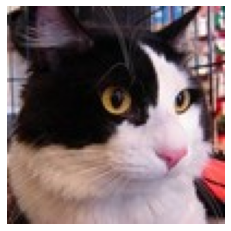

1/1 [==============================] - 0s 75ms/step
Our model says it is a : cat
time: 531 ms (started: 2022-06-03 22:05:54 +05:30)


In [104]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.axis('off')
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)